In [83]:
import numpy as np
import os
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib

In [91]:
data = pd.read_csv(r'pysicalinfo.csv', encoding="euc-kr", low_memory=False)
#data = data[['가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램']]
data = data.drop(['순번','측정 일자'],axis=1)
data.columns = ['가슴둘레', '소매길이', '신장', '허리둘레', '샅높이', '머리둘레', '발길이', '몸무게']
data.head()

,가슴둘레,소매길이,신장,허리둘레,샅높이,머리둘레,발길이,몸무게
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [92]:
data['허리둘레'] = pd.to_numeric(data['허리둘레'].str.split('(').str[0].str.strip(), errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   가슴둘레    167980 non-null  float64
 1   소매길이    167980 non-null  float64
 2   신장      167980 non-null  float64
 3   허리둘레    167980 non-null  float64
 4   샅높이     167980 non-null  float64
 5   머리둘레    167980 non-null  float64
 6   발길이     167980 non-null  float64
 7   몸무게     167980 non-null  float64
dtypes: float64(8)
memory usage: 10.3 MB


In [93]:
X = data.drop('몸무게', axis=1)
y = data['몸무게']
X

,가슴둘레,소매길이,신장,허리둘레,샅높이,머리둘레,발길이
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5
...,...,...,...,...,...,...,...
167975,100.6,86.4,173.2,86.7,77.1,56.9,27.1
167976,97.9,82.7,166.3,90.5,73.4,61.5,28.8
167977,97.9,87.2,175.2,94.3,83.1,57.1,27.6
167978,85.3,86.8,173.6,75.9,76.6,57.6,24.3


In [94]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)
print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)

(134384, 7) (33596, 7)
(134384,) (33596,)


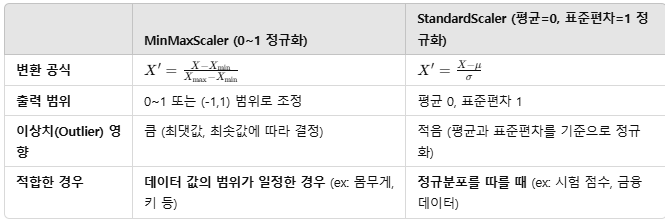

In [95]:
#데이터 전처리
scaler = MinMaxScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns, index=train_X.index)
test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns, index=test_X.index)

In [96]:
#인공신경망 모델 생성 및 학습
model=keras.Sequential([
    keras.layers.Dense(7),  #독립변수개수7
    keras.layers.Dense(256, activation='relu'),   #keras.layers.Dense(256, activation='relu')이부분은 몇줄을 할지 사용자가 임의로 테스트해보면서 최적을 찾는것
    keras.layers.Dense(256, activation='relu'),   #256은 복잡할때 주로 사용, 임의로 정하는 숫자인데 4의배수로 주로 사용. 덜 복잡하면 128정도 임의 사용
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [97]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])    #분류할땐 crossentropy쓰고 회귀할땐 mse씀

In [98]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(train_X, train_y, epochs=50, validation_data=(test_X,test_y), callbacks=[early_stop])

Epoch 1/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 174.4102 - mae: 6.2379 - val_loss: 21.9297 - val_mae: 3.4759
Epoch 2/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 23.7125 - mae: 3.6489 - val_loss: 22.2535 - val_mae: 3.5024
Epoch 3/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 23.3592 - mae: 3.6030 - val_loss: 21.5592 - val_mae: 3.4372
Epoch 4/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 23.0007 - mae: 3.5793 - val_loss: 21.2547 - val_mae: 3.4152
Epoch 5/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 22.7966 - mae: 3.5722 - val_loss: 21.6373 - val_mae: 3.4379
Epoch 6/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 22.7143 - mae: 3.5585 - val_loss: 22.8618 - val_mae: 3.5512
Epoch 7/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 22.2587 - mae: 3.5240 - val_loss: 21.4421 - val_mae: 3.4218
Epoch 8/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 22.4327 - mae: 3.5207 - val_loss: 21.1519 - val_mae: 3.4018
Epoch 9/50
4200

In [99]:
# 새로운 데이터 예측
def predict_new_data(new_data):
    """
    새로운 데이터를 입력받아 예측값을 반환합니다.

    Args:
        new_data: 예측에 사용할 새로운 데이터 (numpy array)

    Returns:
        예측값 (numpy array)
    """
    # 입력 데이터 전처리
    new_data_scaled = scaler.transform(new_data)  # MinMaxScaler를 사용하여 전처리
    # 예측 수행
    prediction = model.predict(new_data_scaled)
    # 예측값 반환
    return prediction

def draw_graph(prediction, label, history):
    X = prediction / np.max(prediction, axis=0)
    Y = label / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

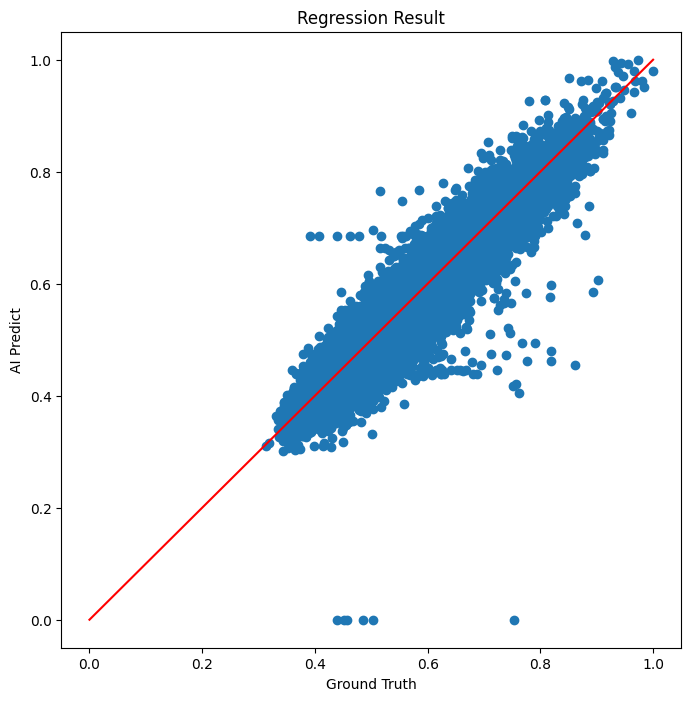

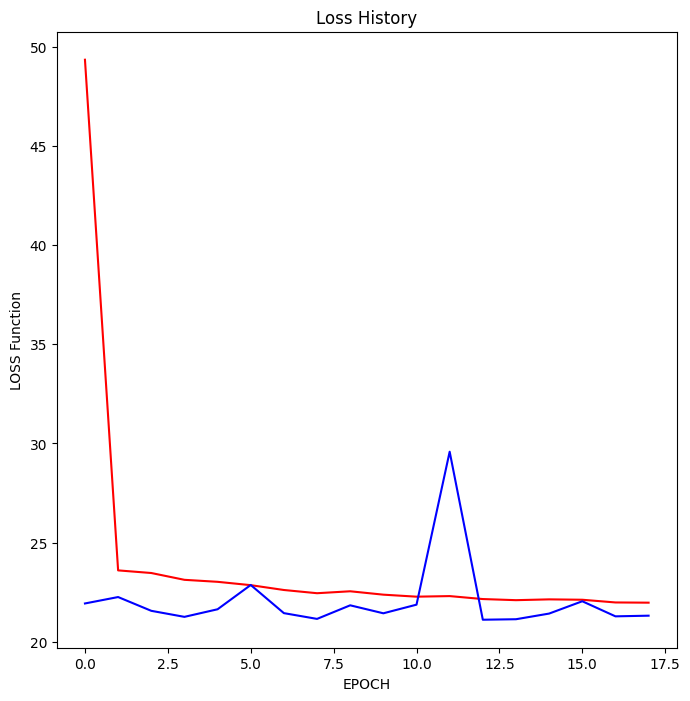

In [100]:
draw_graph(model(test_X), test_y, history)

In [101]:
# 예측 (새로운 데이터 샘플)
new_data_sample = pd.DataFrame([[101, 83, 173, 81, 74, 55, 24]], columns= ['가슴둘레', '소매길이', '신장', '허리둘레', '샅높이', '머리둘레', '발길이'])
prediction = predict_new_data(new_data_sample)   #종속변수에 minmax정규화안하고 독립변수에만 minmax정규화해서 역변환 안함
print("예측 결과:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
예측 결과: [[68.7307]]
